# Fase 3 Análisis Exploratorio de Datos (EDA)
Distribución de Ingresos por Categoría Económica:

Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.

Calcular la diferencia promedio entre ingresos previstos y realizados por cada categoría.

Análisis Temporal:

Evaluar las tendencias a lo largo del tiempo, por ejemplo, cómo cambian los ingresos realizados de un mes a otro o de un año a otro.
Identificación de Discrepancias:

Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
sys.path.append("../") #Para poder importar
from src.SupportCleaning import fill_organo, fill_unidad_gestora,fill_missing_organo_superior,fill_missing_organo,calcular_porcentaje
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
# Carga el dataset de trabajo
pd.set_option("display.max_columns", None) #Ver todo
df = pd.read_csv("../datos/output/datos_2013_to_2021Fase2.csv", delimiter=",",index_col=0)

df

In [130]:
df.groupby("tipo de ingresos")["valor ejecutado"].sum().sort_values(ascending=False).reset_index()


,tipo de ingresos,valor ejecutado
0,Operações de crédito - mercado interno,9316763492833.98
1,Contribuições sociais,6917746031899.48
2,Impostos,4063236173718.52
3,Resultado do Banco Central do Brasil,1021719385009.37
4,Amortizações de Empréstimos,998477415319.29
...,...,...
58,Outras receitas,2177.78
59,Receita da dívida ativa,147.23
60,Demais receitas de capital,0.00
61,Contribuições para Entidades Privadas de Serv,0.00


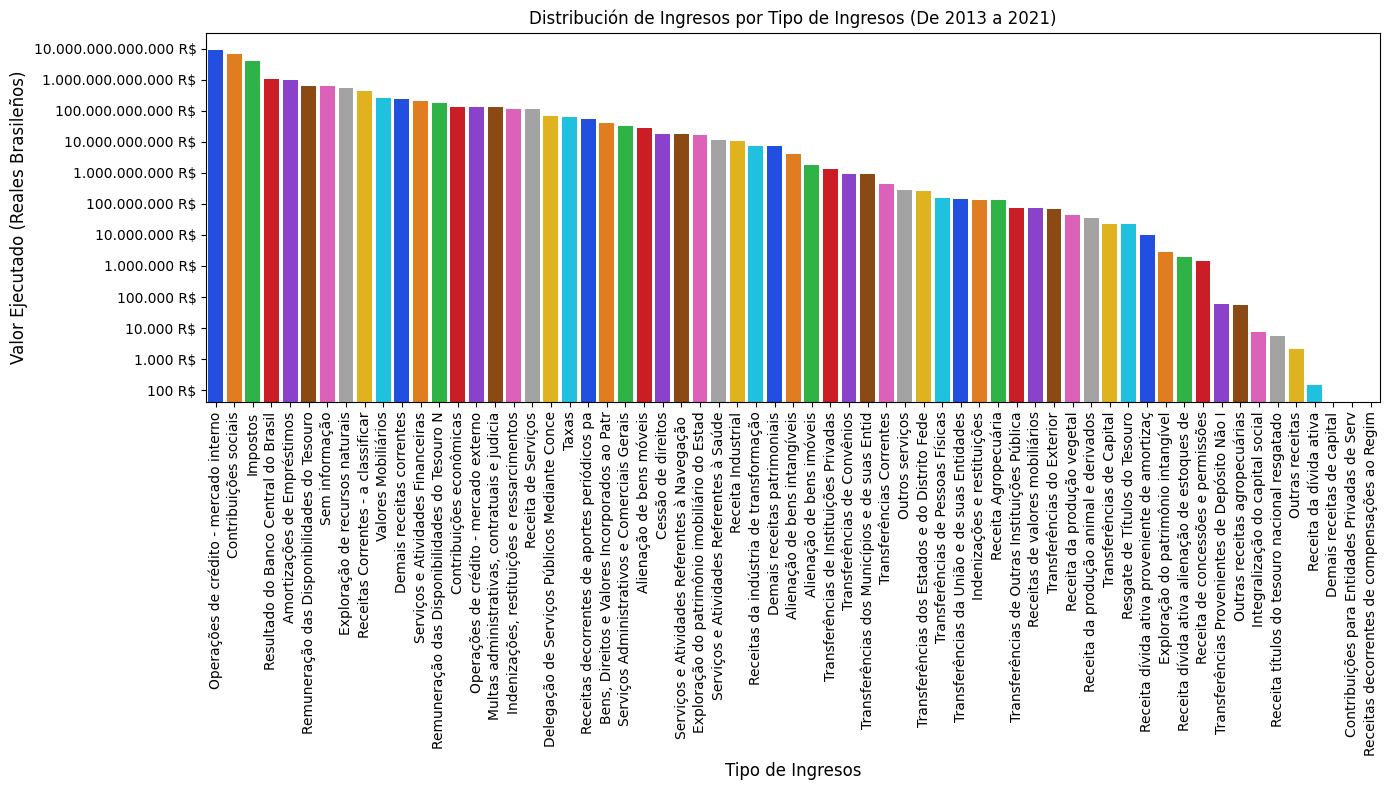

In [131]:
dinero_por_tipodeingresos = df.groupby("tipo de ingresos")["valor ejecutado"].sum().sort_values(ascending=False).reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(14,8))
sns.barplot(x="tipo de ingresos", y="valor ejecutado", data=dinero_por_tipodeingresos, palette="bright",)
plt.title("Distribución de Ingresos por Tipo de Ingresos (De 2013 a 2021)")
plt.ylabel("Valor Ejecutado (Reales Brasileños)",fontsize=12)
plt.xlabel("Tipo de Ingresos",fontsize=12)
plt.yscale('log')  # Escala logarítmica en el eje X para visualizar mejor los valores pequeños
plt.xticks(rotation=90)
plt.yticks(ticks=[1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12,1e13],
            labels=["100 R$","1.000 R$","10.000 R$","100.000 R$","1.000.000 R$","10.000.000 R$","100.000.000 R$",
                    "1.000.000.000 R$","10.000.000.000 R$","100.000.000.000 R$","1.000.000.000.000 R$","10.000.000.000.000 R$"])
plt.tight_layout()

# Top 3 Ingresos más rentables

In [132]:
df.groupby("tipo de ingresos")["valor ejecutado"].sum().nlargest(3).reset_index()

,tipo de ingresos,valor ejecutado
0,Operações de crédito - mercado interno,9316763492833.98
1,Contribuições sociais,6917746031899.48
2,Impostos,4063236173718.52


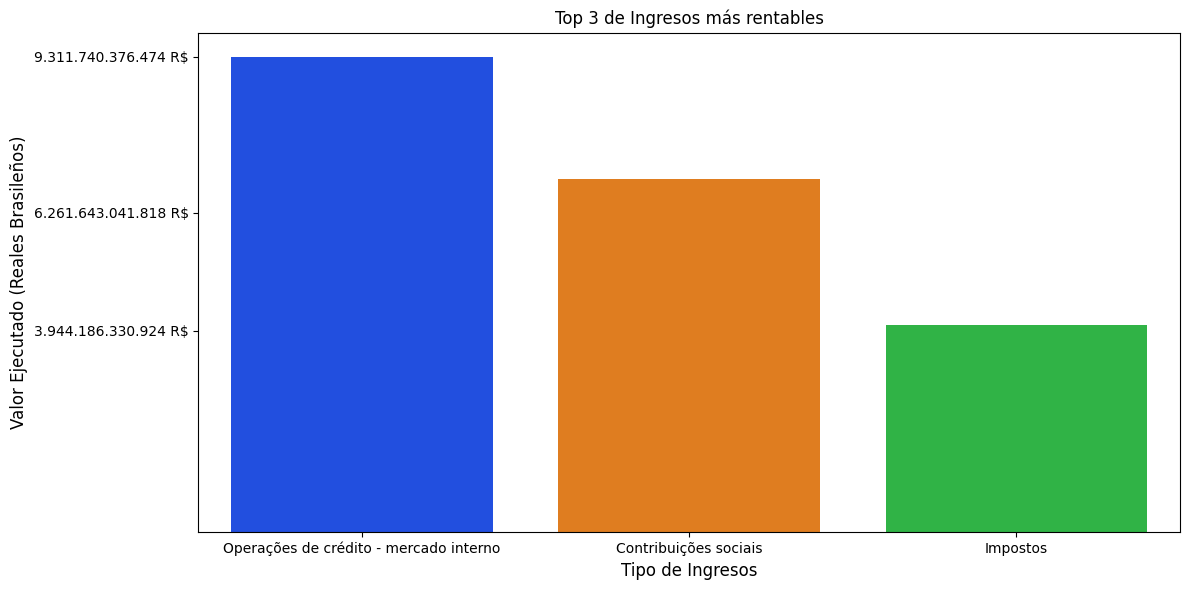

In [133]:
dinero_por_tipodeingresos = df.groupby("tipo de ingresos")["valor ejecutado"].sum().nlargest(3).reset_index()
# Crear un gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x="tipo de ingresos", y="valor ejecutado", data=dinero_por_tipodeingresos, palette="bright",)
plt.title("Top 3 de Ingresos más rentables")
plt.ylabel("Valor Ejecutado (Reales Brasileños)",fontsize=12)
plt.xlabel("Tipo de Ingresos",fontsize=12)
plt.yticks(ticks=[3944186330924,6261643041818,9311740376474],labels=["3.944.186.330.924 R$","6.261.643.041.818 R$","9.311.740.376.474 R$"])
plt.tight_layout()

In [ ]:
df.head(1)

,código del órgano superior,nombre del órgano superior,código del órgano,nombre del órgano,código de la unidad gestora,nombre de la unidad gestora,categoría económica,origen de los ingresos,tipo de ingresos,valor previsto actualizado,valor registrado,valor ejecutado,nuevo porcentaje ejecutado,año fiscal
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",0.00,0.00,1297.13,0.00,2013


# Diferencia promedio entre ingresos previstos y realizados por categoría económica

In [141]:
df["diferencia_ingresos"] = df["valor previsto actualizado"] - df["valor ejecutado"]
diferencia_promedio = df.groupby("categoría económica")["diferencia_ingresos"].mean().reset_index()
diferencia_promedio.columns = ["categoría económica", "diferencia promedio"]
diferencia_promedio["diferencia promedio"] = -diferencia_promedio["diferencia promedio"] #Invertimos debido a que si sale negativo es que hemos recaudado de promedio más
diferencia_promedio


,categoría económica,diferencia promedio
0,Receitas Correntes,322201.01
1,Receitas Correntes - intra-orçamentárias,762785.75
2,Receitas de Capital,-35948290.37
3,Receitas de Capital - intra-orçamentárias,120694478.39
4,Sem informação,-36088339.83


In [144]:
esperado1 = df["valor previsto actualizado"].sum()
esperado2 = df["valor registrado"].sum()
recaudado = df["valor ejecutado"].sum()

(esperado1 + esperado2) - recaudado

np.float64(8198978917800.082)